In [ ]:
import pandas as pd
import numpy as np

In [ ]:
heart= pd.read_csv('/content/drive/MyDrive/heart.csv')

In [ ]:
heart.info()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
sns.pairplot(heart)

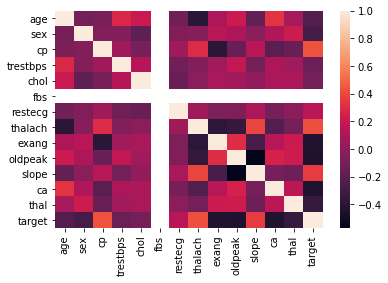

In [ ]:
sns.heatmap(correlation)

In [ ]:
## Correlation Matrix
sns.set(style="dark")

# Compute the correlation matrix
corr = heart.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(120, 17, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio


In [ ]:
heart.boxplot(figsize=(10,15))

In [ ]:
trestbps
chol    
fbs 
thalach
oldpeak
ca      
thal

In [ ]:
q1 = heart['trestbps'].quantile(.25)
q3 = heart['trestbps'].quantile(.75)
IQR = q3-q1
heart['trestbps'] = np.clip(heart['trestbps'],q1-1.5*IQR, q3+1.5*IQR)


q1 = heart['chol'].quantile(.25)
q3 = heart['chol'].quantile(.75)
IQR = q3-q1
heart['chol'] = np.clip(heart['chol'],q1-1.5*IQR, q3+1.5*IQR)

q1 = heart['fbs'].quantile(.25)
q3 = heart['fbs'].quantile(.75)
IQR = q3-q1
heart['fbs'] = np.clip(heart['fbs'],q1-1.5*IQR, q3+1.5*IQR)
q1 = heart['thalach'].quantile(.25)
q3 = heart['thalach'].quantile(.75)
IQR = q3-q1
heart['thalach'] = np.clip(heart['thalach'],q1-1.5*IQR, q3+1.5*IQR)
q1 = heart['ca'].quantile(.25)
q3 = heart['ca'].quantile(.75)
IQR = q3-q1
heart['ca'] = np.clip(heart['ca'],q1-1.5*IQR, q3+1.5*IQR)
q1 = heart['oldpeak'].quantile(.25)
q3 = heart['oldpeak'].quantile(.75)
IQR = q3-q1
heart['oldpeak'] = np.clip(heart['oldpeak'],q1-1.5*IQR, q3+1.5*IQR)

heart['ca'] = np.clip(heart['ca'],q1-1.5*IQR, q3+1.5*IQR)
q1 = heart['thal'].quantile(.25)
q3 = heart['thal'].quantile(.75)
IQR = q3-q1
heart['thal'] = np.clip(heart['thal'],q1-1.5*IQR, q3+1.5*IQR)

In [ ]:
heart

In [ ]:
heart['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [ ]:
heart= heart.drop(heart['fbs'])

In [ ]:
X=heart.drop(['target'],axis=1)
Y=heart['target']

In [ ]:
import seaborn as sns
correlation= heart.corr()
correlation

In [ ]:
# looking at the unique values of the dataframe features for identifying possible categorical
# and numerical feautures 
train_df = heart
unique_values = []
for i in range(len(train_df.columns)):
    unique_values.append([train_df.columns[i],train_df.iloc[:,i].nunique(),train_df.iloc[:,i].dtypes])


unique_values = pd.DataFrame(unique_values)
unique_values.columns = ['Column name', 'Unique_values','Dtypes']
#unique_values['datatype'] =unique_values[i].dtypes
print(unique_values)
print(heart.shape)

   Column name  Unique_values   Dtypes
0          age             41    int64
1          sex              2    int64
2           cp              4    int64
3     trestbps             43    int64
4         chol            148  float64
5          fbs              1    int64
6      restecg              3    int64
7      thalach             91  float64
8        exang              2    int64
9      oldpeak             36  float64
10       slope              3    int64
11          ca              4  float64
12        thal              4  float64
13      target              2    int64
(302, 14)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=8)

APPLYING lOGISTIC AGRESSION

In [ ]:
#call the model
from sklearn.linear_model import LogisticRegression
lr_model= LogisticRegression()

In [ ]:
#Fit the model
clf = lr_model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
print(y_predicted)

[0 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
print('Accuracy:', accuracy_score(Y_test, y_predicted))
print('f1_score:', f1_score(Y_test, y_predicted))
print('recall_score:', recall_score(Y_test, y_predicted))
print('precision_score:', precision_score(Y_test, y_predicted))
print('f1_score: {}'.format(f1_score(Y_test, y_predicted)))
#Accuracy: 0.8032786885245902
#f1_score: 0.8181818181818182
#recall_score: 0.75
#precision_score: 0.9
#f1_score: 0.8181818181818182

Accuracy: 0.9180327868852459
f1_score: 0.9315068493150684
recall_score: 0.9444444444444444
precision_score: 0.918918918918919
f1_score: 0.9315068493150684


Applying Random Forest

In [ ]:
#call the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion="gini", max_depth=3)
clf=rf_model.fit(X_train, Y_train)
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
print(y_predicted)

[1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1]


In [ ]:
print('Accuracy for RF:', accuracy_score(Y_test, y_predicted))
print('f1_score for RF:', f1_score(Y_test, y_predicted))
print('recall_score for RF:', recall_score(Y_test, y_predicted))
print('precision_score for RF:', precision_score(Y_test, y_predicted))

#Accuracy for RF: 0.8852459016393442
#f1_score for RF: 0.9113924050632911
#recall_score for RF: 0.9230769230769231
#precision_score for RF: 0.9

Accuracy for RF: 0.8524590163934426
f1_score for RF: 0.8732394366197184
recall_score for RF: 0.8611111111111112
precision_score for RF: 0.8857142857142857


Applying DT

In [ ]:
#call the model
from sklearn.tree import DecisionTreeClassifier
dt_model= DecisionTreeClassifier(criterion="gini", max_depth=3)
clf=dt_model.fit(X_train, Y_train)
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
print(y_predicted)

[1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1]


In [ ]:
print('Accuracy for DT:', accuracy_score(Y_test, y_predicted))
print('f1_score for DT:', f1_score(Y_test, y_predicted))
print('recall_score for DT:', recall_score(Y_test, y_predicted))
print('precision_score for DT:', precision_score(Y_test, y_predicted))
#Accuracy for DT: 0.8524590163934426
#f1_score for DT: 0.8767123287671232
#recall_score for DT: 0.8888888888888888
#precision_score for DT: 0.8648648648648649

Accuracy for DT: 0.8524590163934426
f1_score for DT: 0.8767123287671232
recall_score for DT: 0.8888888888888888
precision_score for DT: 0.8648648648648649


In [ ]:
from sklearn.decomposition import PCA
pca_model = PCA()
pca_result = pca_model.fit_transform(X)

In [ ]:
print(pca_model.explained_variance_ratio_)

[7.23124310e-01 1.70436480e-01 8.65756033e-02 1.85935270e-02
 4.03676096e-04 3.01422416e-04 1.98777557e-04 1.09383815e-04
 8.70411154e-05 6.65702099e-05 5.63920120e-05 4.68158405e-05
 3.28706651e-37]


In [ ]:
X_pca = pd.DataFrame(pca_result)
print(X_pca)
a = []

for i in range(1,14):
    a.append('PC{}'.format(i))
    
X_pca.head()   

In [ ]:
print(pca_model.components_)

In [ ]:
df=X_pca

In [ ]:
df

In [ ]:
X= df.iloc[:,0:1]
Y=Y

In [ ]:
#call the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion="gini", max_depth=3)
clf=rf_model.fit(X_train, Y_train)
#Use the fitted model for prediction on test dataset
y_predicted = clf.predict(X_test)
print(y_predicted)

[1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0
 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1]


In [ ]:
print('Accuracy for DT:', accuracy_score(Y_test, y_predicted))
print('f1_score for DT:', f1_score(Y_test, y_predicted))
print('recall_score for DT:', recall_score(Y_test, y_predicted))
print('precision_score for DT:', precision_score(Y_test, y_predicted))

Accuracy for DT: 0.8360655737704918
f1_score for DT: 0.8571428571428571
recall_score for DT: 0.8333333333333334
precision_score for DT: 0.8823529411764706


K fold cross validation

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))
for name,model in models:
kfold=KFold(n_splits=10,random_state=7)
cross_val_sc=cross_val_score(model,X,y,scoring='accuracy',cv=kfol
d)
print('{} : acc: {}(standard deviation: {})'.format(name,cross_va
l_sc.mean(),cross_val_sc.std()))

Statified K fold cross validation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
cv = StratifiedKFold(10)
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, rand
om_state=7)
model_dt = DecisionTreeClassifier()
score=cross_val_score(model_rf, X_train, y_train, cv=cv)
print(f'score of random forest classifier:{score.mean()}')
score=cross_val_score(model_dt, X_train, y_train, cv=cv)
print(f'score of decision tree classifier:{score.mean()}')